Цель исследования - изучить рынок общественного питания Москвы.<br>У нас есть открытые данные о заведениях общественного питания в Москве.<br>Мы ставим перед собой следующие вопросы:
<br>Что характерно для сетевых заведений? Для несетевых?
<br>Каково среднее кол-во посадочных мест для разных типов заведений?
<br>В каких районах Москвы находятся улицы с самым большим кол-вом заведений?
<br>В каких районах Москвы находятся улицы с одним заведением?
<br>Какие закономерности можно обнаружить у заведений на самых популярных улицах?


#### Шаг №1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd

In [2]:
rest_data=pd.read_csv('/datasets/rest_data.csv')

In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [6]:
rest_data.duplicated().sum()

0

В данных нет пропусков, типы данных определенны верно - данные готовы к анализу.

#### Шаг №2. Анализ данных

#### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Text(0.5, 1.0, 'Соотношение видов объектов общественного питания по количеству')

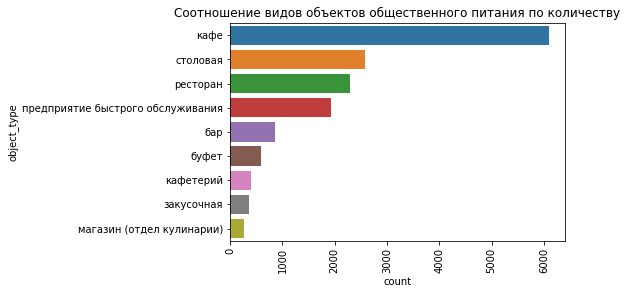

In [9]:
g=sns.countplot(y="object_type",data=rest_data,order = rest_data['object_type'].value_counts().index)
plt.xticks(rotation=90)
g.set_title('Соотношение видов объектов общественного питания по количеству')

На основании количества можно судить, что кафе больше всего из всех видов объектов общественного питания.

#### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

Text(0.5, 1.0, 'Соотношение сетевых и несетевых заведений по количеству')

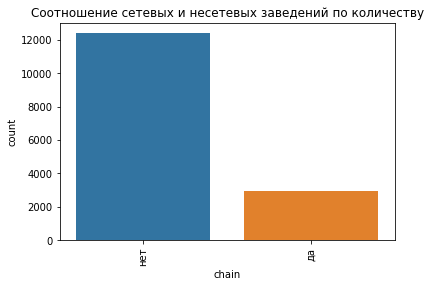

In [10]:
g=sns.countplot(x="chain",data=rest_data,order = rest_data['chain'].value_counts().index)
plt.xticks(rotation=90)
g.set_title('Соотношение сетевых и несетевых заведений по количеству')

In [11]:
len(rest_data.query('chain=="нет"'))/len(rest_data.query('chain=="да"'))

4.17722371967655

Несетевых заведений в 4.17 раза больше, чем сетевых.

#### Для какого вида объекта общественного питания характерно сетевое распространение?

Text(0.5, 1.0, 'Соотношение видов объектов общественного питания по принадлежности к сетям')

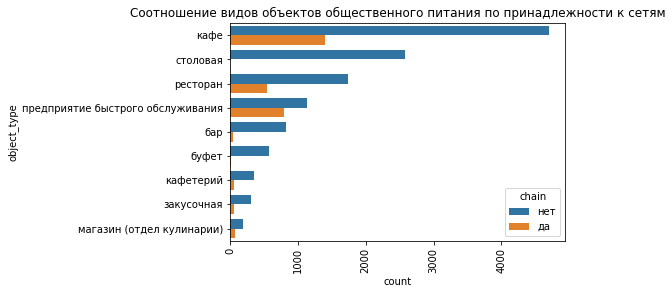

In [12]:
g=sns.countplot(y="object_type",hue='chain',data=rest_data,order = rest_data['object_type'].value_counts().index)
plt.xticks(rotation=90)
g.set_title('Соотношение видов объектов общественного питания по принадлежности к сетям')

Сетевое распространение характерно в большей степени для кафе и предприятий быстрого обслуживания.

Судя по количественному графику для кафе в наибольшей степени характерно сетевое распространение, затем идут предприятия быстрого обслуживания и рестораны.<br>Совсем небольшая доля у баров, кафетериев, закусочных и отделов кулинарии.

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [13]:
rest_data.pivot_table(index='chain',values='number',aggfunc=['count','mean'])

,count,mean
,number,number
chain,,
да,2968,52.919811
нет,12398,61.133731


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

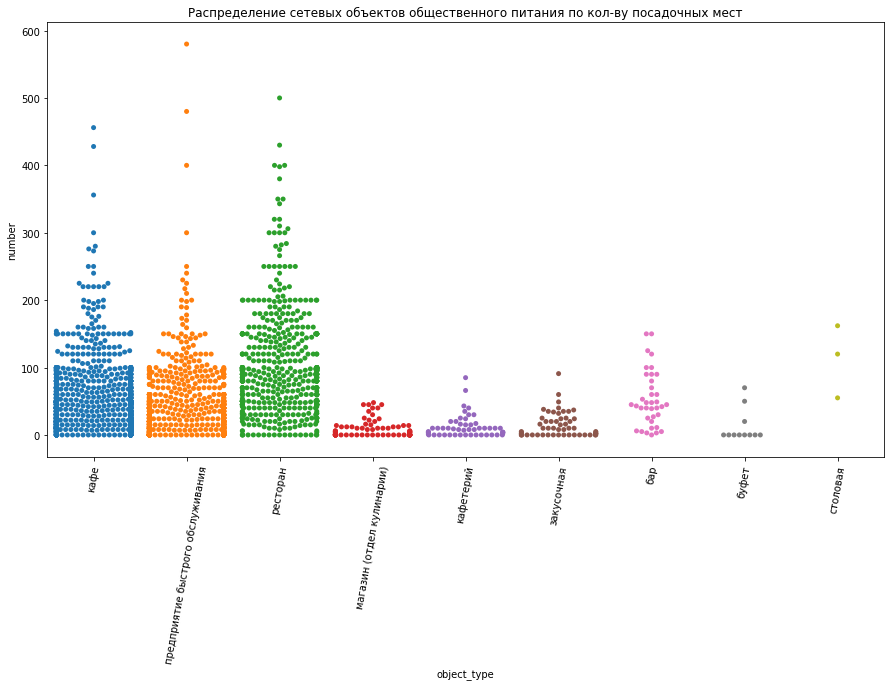

In [18]:
plt.figure(figsize=(15,8))
plt.title('Распределение сетевых объектов общественного питания по кол-ву посадочных мест')
ax=sns.swarmplot(x='object_type',y='number',data=rest_data.query('chain=="да"'))
plt.xticks(rotation=80)

In [16]:
len(rest_data.query('chain=="да" and object_type=="буфет"'))

11

In [15]:
rest_data['number'].mean()

59.5471820903293

В среднем кол-во посадочных мест по всей выборке - 59, исходя из этого - на графике стремятся к большему кол-ву кафе, предприятия быстрого обслуживания и рестораны.<br>Однако в целом кол-во посадочных мест ненамного превышает среднее по выборке, из чего можно сделать вывод, что сетевые заведения стремятся к большему кол-ву заведений с чуть большим, чем средним, кол-вом посадочных мест.

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [16]:
mean_numbers=rest_data.groupby('object_type').agg({'number':'mean'}).sort_values(by='number').reset_index()
mean_numbers

,object_type,number
0,магазин (отдел кулинарии),5.589744
1,закусочная,7.608333
2,кафетерий,9.123116
3,предприятие быстрого обслуживания,20.552262
4,кафе,39.716019
5,бар,43.494159
6,буфет,51.129915
7,ресторан,96.834136
8,столовая,130.246618


Text(0.5, 1.0, 'Соотношение видов объектов общественного питания по количеству посадочных мест')

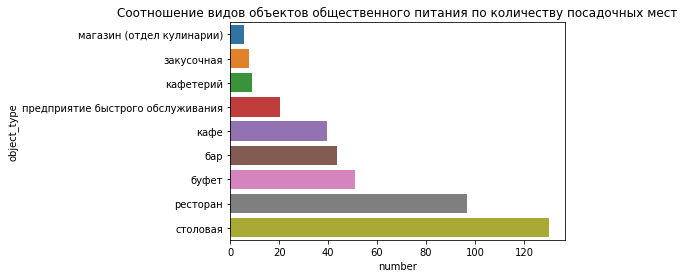

In [17]:
g=sns.barplot(x='number',y='object_type',data=mean_numbers)
g.set_title('Соотношение видов объектов общественного питания по количеству посадочных мест')

В столовых самое большое кол-во посадочных мест.

#### Выделите в отдельный столбец информацию об улице из столбца address .

In [18]:
def get_street(line):
    if line.split(',')[0]=="город Москва" and line.split(',')[1]==" поселение Московский":
        return line.split(',')[1]+','+line.split(',')[2]
    if line.split(',')[0]=="город Москва" and line.split(',')[1]==" город Зеленоград":
        return line.split(',')[1]+','+line.split(',')[2]
    if line.split(',')[0]=="город Москва" and line.split(',')[1]==" поселение Сосенское":
        return line.split(',')[1]+','+line.split(',')[2]
    if line.split(',')[0]=="город Москва":
        return line.split(',')[1]


In [19]:
rest_data['street']=rest_data['address'].apply(get_street)

In [20]:
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,"поселение Московский, Киевское шоссе"


Напишем функцию, которая будет обращаться к API Геокодера, на вход принимать адрес и на выходе отдавать район.

In [21]:
import requests
from bs4 import BeautifulSoup

In [22]:
def get_coordinates(address):
    BASE_URL='https://geocode-maps.yandex.ru/1.x'
    params={
        'apikey':'f24a9db0-f617-4183-a075-12961d806131',
        'format':'xml',
        'geocode':address
    }
    response = requests.get(BASE_URL, params=params)
    soup=BeautifulSoup(response.text, 'lxml')
    
    try:
        position=soup.find('pos')
        return position.text
    except AttributeError:
        pass
    

In [23]:
def get_district(address):
    
    coordinates=get_coordinates(address)
    BASE_URL='https://geocode-maps.yandex.ru/1.x'
    params={
        'apikey':'f24a9db0-f617-4183-a075-12961d806131',
        'format':'xml',
        'geocode':coordinates
    }
    response = requests.get(BASE_URL, params=params)
    soup=BeautifulSoup(response.text,'lxml')
    try:
        full_address=soup.find_all('text')[1]
        district=full_address.text.split(',')[3].strip()
        return district
    except IndexError:
        pass

In [24]:
#rest_data['district']=('Москва'+rest_data['street']).apply(get_distribct)
#районы для всего датасета

In [25]:
#rest_data.to_csv('rest_data.csv') сохранили в датасет, т.к. долго считывает

In [26]:
rest_data=pd.read_csv('rest_data.csv')

In [27]:
rest_data['district'].value_counts()

Тверской район          740
Пресненский район       676
Басманный район         471
Даниловский район       420
Хорошёвский район       391
                       ... 
Валуевский лесопарк       1
квартал № 10              1
район Старое Крюково      1
19-й микрорайон           1
район Восточный           1
Name: district, Length: 171, dtype: int64

#### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [28]:
rest_data['street']=rest_data['street'].str.strip()

In [29]:
top10street=rest_data['street'].value_counts()[:10]
top10street

проспект Мира             204
Профсоюзная улица         182
Ленинградский проспект    171
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
проспект Вернадского      132
Кутузовский проспект      114
Каширское шоссе           112
Кировоградская улица      110
Name: street, dtype: int64

Text(0.5, 1.0, 'Топ-10 улиц по кол-ву заведений на них')

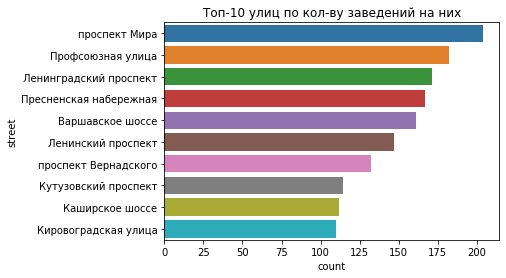

In [30]:
g=sns.countplot(y="street",data=rest_data,order = rest_data['street'].value_counts()[:10].index)
g.set_title('Топ-10 улиц по кол-ву заведений на них')

In [31]:
for street in top10street.index.str.strip():
    print(street,'находится в',rest_data.query('street==@street')['district'].values[0])

проспект Мира находится в Алексеевский район
Профсоюзная улица находится в район Коньково
Ленинградский проспект находится в Хорошёвский район
Пресненская набережная находится в Пресненский район
Варшавское шоссе находится в район Чертаново Южное
Ленинский проспект находится в Ломоносовский район
проспект Вернадского находится в Ломоносовский район
Кутузовский проспект находится в район Дорогомилово
Каширское шоссе находится в район Москворечье-Сабурово
Кировоградская улица находится в район Чертаново Центральное


#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [32]:
onerest_streets=pd.read_csv('onerest_streets.csv')

In [33]:
#onerest_streets=rest_data[['address','street']]['street'].value_counts().to_frame().query('street==1').reset_index()

In [34]:
#onerest_streets.columns=['street','count']

In [35]:
#onerest_streets=pd.merge(onerest_streets,rest_data[['address','street']],left_on='street',right_on='street')

In [36]:
#onerest_streets['district']=('Москва'+onerest_streets['street']).apply(get_district)
#здесь обращались к API Геокодера, чтобы не ждать я сохранил в  csv

In [37]:
#onerest_streets.to_csv('onerest_streets.csv')

Text(0.5, 1.0, 'Районы улиц с 1-м заведением')

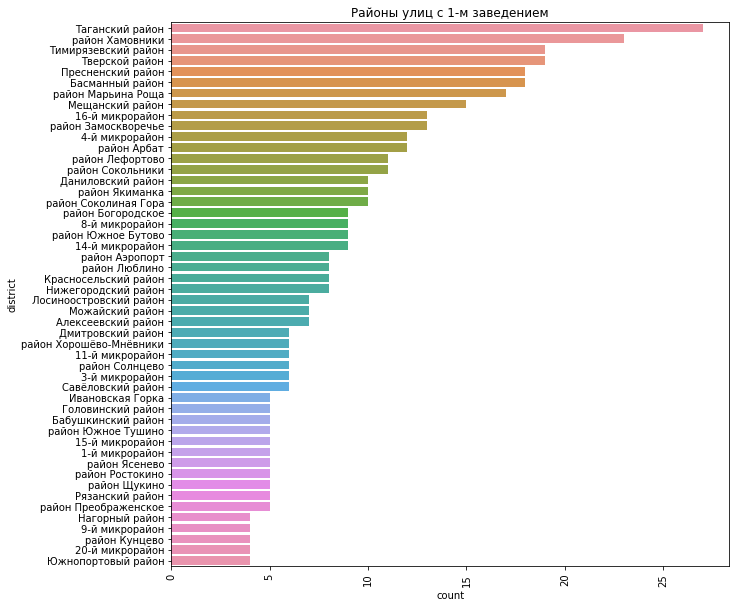

In [38]:
plt.figure(figsize=(10,10))
g=sns.countplot(y="district",data=onerest_streets,order = onerest_streets['district'].value_counts()[:50].index)
plt.xticks(rotation=90)
g.set_title('Районы улиц с 1-м заведением')

In [50]:
len(onerest_streets)

642

Всего в датасете 642 улицы с 1 рестораном.

#### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [39]:
top10street=top10street.to_frame().reset_index()

In [40]:
top10street

,index,street
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


In [41]:
top10street.columns=['street','count']

In [42]:
top10street['street']=top10street['street'].str.strip()

In [43]:
top10street_numbers=pd.merge(top10street,rest_data[['street','number']],how='left',on='street')

Text(0.5, 1.0, 'Распределение посадочных мест для заведений, находящихся на одной из топ-10 улиц')

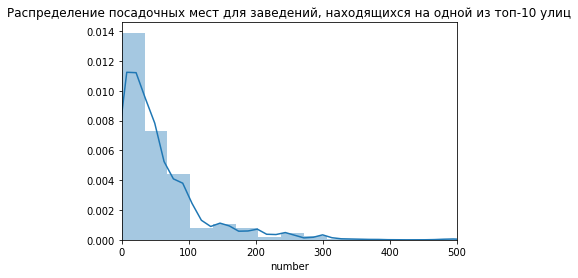

In [44]:
ax=sns.distplot(top10street_numbers['number'],bins=50)
ax.set_xlim([0, 500])
ax.set_title('Распределение посадочных мест для заведений, находящихся на одной из топ-10 улиц')

Кол-во посадочных мест редко превышает 100, наиболее часто это небольшие заведения с кол-вом мест около 25.

#### Подробнеее по районам

In [45]:
data_districts=rest_data.query('street.isin(@top10street.street)').groupby(['district','chain']).agg({'object_type':'value_counts'})
data_districts.columns=['count']
data_districts.reset_index(inplace=True)


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1008x576 with 0 Axes>

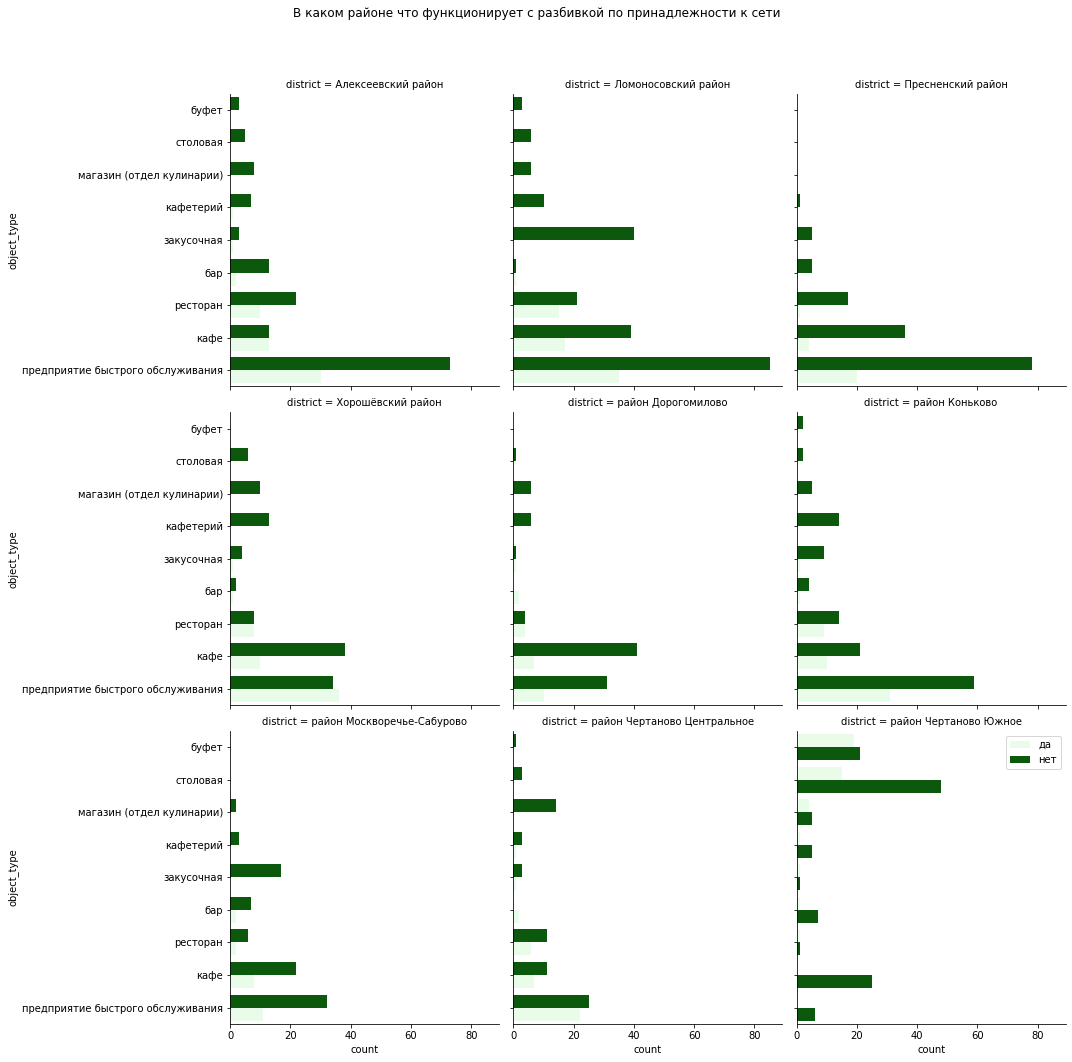

In [46]:
plt.figure(figsize=(14,8))
g=sns.FacetGrid(data_districts,col='district',col_wrap=3,aspect=1,height=5)
g.map(sns.barplot,'count','object_type','chain',color='#006400')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('В каком районе что функционирует с разбивкой по принадлежности к сети')
plt.legend()


In [47]:
data_numbers=rest_data.query('street.isin(@top10street.street)').groupby('district')['number'].median().to_frame().reset_index()

In [48]:
data_numbers

,district,number
0,Алексеевский район,46.5
1,Ломоносовский район,40.0
2,Пресненский район,30.0
3,Хорошёвский район,40.0
4,район Дорогомилово,40.0
5,район Коньково,24.0
6,район Москворечье-Сабурово,25.0
7,район Чертаново Центральное,30.0
8,район Чертаново Южное,30.0


Text(0.5, 1.0, 'Распределение посадочных мест для заведений по районам')

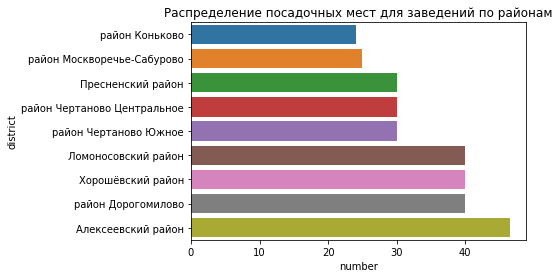

In [49]:
ax=sns.barplot(x='number',y='district',data=data_numbers.sort_values(by='number'))
ax.set_title('Распределение посадочных мест для заведений по районам')

#### Вывод

В ходе проекта было выявлено, что кафе больше всего из всех видов объектов общественного питания.<br> Несетевых заведений в 4.17 раза больше, чем сетевых.<br>Судя по количественному графику для кафе в наибольшей степени характерно сетевое распространение, затем идут предприятия быстрого обслуживания и рестораны.<br>Мы сделали вывод
,что сетевые заведения стремятся к большему кол-ву заведений с чуть большим, чем средним, кол-вом посадочных мест. 
<br>Также в столовых самое большое кол-во посадочных мест.

Рекомендации:
Мы бы рекомендовали открыть кафе на 40 посадочных мест в Ломоносовском районе.